In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

os.environ['CUDA_VISIBLE_DEVICES']="1"


from os.path import exists


In [2]:
print("\n\n")
print("  numpy version:  %s" % str(np.version.version) )

print("\n\n")




  numpy version:  1.26.4





## Set model and resolution parameters

In [3]:
ndim = 1


of_niter = 5





input_dir = 'input-samples-smearing-0.00-v1a'


output_dir = 'hist-pdf-study-1d-read-input-v1a-smearing-0.00'



#-- parameters for simple pdf

hist_low = -10.
hist_high = 10.

hist_nbins = 1000


hist_binwidth = (hist_high - hist_low) / hist_nbins

window_dx = 0.10

window_nbins = int( window_dx / hist_binwidth )

print(' window_nbins : %d' % window_nbins)

hist_pars = {}
hist_pars['low']  = hist_low
hist_pars['high'] = hist_high
hist_pars['nbins'] = hist_nbins
hist_pars['binwidth'] = hist_binwidth
hist_pars['window_dx'] = window_dx
hist_pars['window_nbins'] = window_nbins



 window_nbins : 5


In [4]:
hist_pars

{'low': -10.0,
 'high': 10.0,
 'nbins': 1000,
 'binwidth': 0.02,
 'window_dx': 0.1,
 'window_nbins': 5}

In [5]:
try:
    os.mkdir( output_dir )
except:
    print('\n\n Output directory already exists:  %s' % output_dir)
    #print('\n\n HALTING EXECUTION\n\n')
    #sys.exit()

In [6]:
config_file = open('%s/config.txt' % output_dir, 'w' )

config_file.write('  input_dir  %s\n' % input_dir )
config_file.write(' of_niter %d\n' % of_niter )
config_file.write( 'hist pars %s\n' % str(hist_pars) )
config_file.close()

print( subprocess.getoutput('cat %s/config.txt' % output_dir ))



  input_dir  input-samples-smearing-0.00-v1a
 of_niter 5
hist pars {'low': -10.0, 'high': 10.0, 'nbins': 1000, 'binwidth': 0.02, 'window_dx': 0.1, 'window_nbins': 5}


## Count the number of samples in the input directory and read in the first one

In [7]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/sample-%04d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d samples.\n\n" % n_samples )



 Found 500 samples.




In [8]:
def read_sample( input_dir, sample_index ) :
    
    with open( '%s/sample-%04d.npy' % (input_dir, sample_index), 'rb' ) as f :
        read_true_pts = np.load(f)
        read_true_det_pts = np.load(f)
        read_train_pts = np.load(f)
        read_train_det_pts = np.load(f)

    ngen_true = len(read_true_pts)
    ngen_train = len(read_train_pts)

    this_ngen_true = ngen_true

    #-- package these in the same format as what I was using.

    true_pts = np.zeros( shape=(ngen_true,1) )
    true_pts[:,0] = read_true_pts

    true_det_pts = np.zeros( shape=(ngen_true,1) )
    true_det_pts[:,0] = read_true_det_pts

    train_pts = np.zeros( shape=(ngen_train,1) )
    train_pts[:,0] = read_train_pts

    train_det_pts = np.zeros( shape=(ngen_train,1) )
    train_det_pts[:,0] = read_train_det_pts
    
    return_dict = {}
    
    return_dict['true_pts'] = true_pts
    return_dict['true_det_pts'] = true_det_pts
    return_dict['train_pts'] = train_pts
    return_dict['train_det_pts'] = train_det_pts
    return_dict['ngen_true'] = ngen_true
    return_dict['ngen_train'] = ngen_train
    
    return return_dict
    
    

In [9]:

rd = read_sample( input_dir, 0 )

ngen_true = rd['ngen_true']
ngen_train = rd['ngen_train']

true_pts = rd['true_pts']
true_det_pts = rd['true_det_pts']
train_pts = rd['train_pts']
train_det_pts = rd['train_det_pts']


print('  true_pts:   ngen_true  = %8d,  shape = %s' % (ngen_true, str(true_pts.shape)) )
print('  train_pts:  ngen_train = %8d,  shape = %s' % (ngen_train, str(train_pts.shape)) )


  true_pts:   ngen_true  =    10000,  shape = (10000, 1)
  train_pts:  ngen_train =   100000,  shape = (100000, 1)


## Plots to visualize these parameter choices

<function matplotlib.pyplot.show(close=None, block=None)>

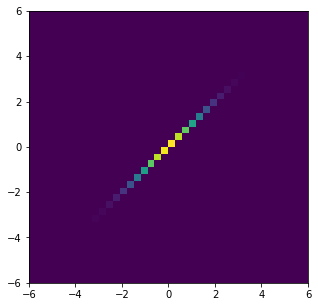

In [10]:
fig,ax = plt.subplots( ndim, ndim, figsize=(ndim*5, ndim*5))

hmin=-6
hmax=6
hbins=40

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if ndim > 1 :
            thisax = ax[i][j]
        else :
            thisax = ax
            
        thisax.hist2d( train_pts[:,i], train_pts[:,j], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

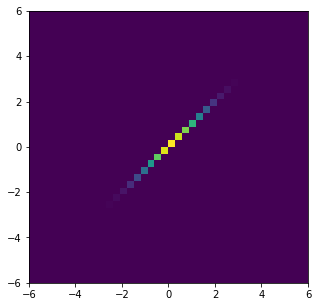

In [11]:
fig,ax = plt.subplots( ndim, ndim, figsize=(ndim*5, ndim*5))

hmin=-6
hmax=6
hbins=40

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if ndim > 1 :
            thisax = ax[i][j]
        else :
            thisax = ax
        thisax.hist2d( true_pts[:,i], true_pts[:,j], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

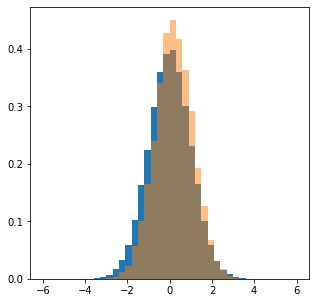

In [12]:
fig,ax = plt.subplots( 1, ndim, figsize=(ndim*5,5))

hmin=-6
hmax=6
hbins=40


for i in range(ndim) :
        k = i*3 + j
        if ndim > 1 :
            thisax = ax[i]
        else :
            thisax = ax
        thisax.hist( train_pts[:,i],bins=hbins, range=[hmin,hmax], density=True )
        thisax.hist( true_pts[:,i],bins=hbins, range=[hmin,hmax], density=True, alpha=0.5 )
    
plt.show

## Function that estimates the pdf from a histogram (multi-bin sum)

In [13]:

#-- computes pdf2/pdf1 at location of points1
#
#    for OmniFold step 1, points2 is the data, points1 is the MC
#

def pdf_ratio_from_hist( points1, points2, weights1, weights2, hist_pars, verbose=0 ) :
    
    ndim = points1.shape[1]
    
    if ndim > 1 :
        print('\n\n *** Only 1D supported for now.\n\n')
        sys.exit()
        
    hist_low = hist_pars['low']
    hist_high = hist_pars['high']
    hist_nbins = hist_pars['nbins']
    hist_binwidth = hist_pars['binwidth']
    
    
    nph1 = np.histogram( points1[:,0], hist_nbins, range=[hist_low, hist_high], weights=weights1 )
    nph2 = np.histogram( points2[:,0], hist_nbins, range=[hist_low, hist_high], weights=weights2 )
    
    hist_pdf1 = np.zeros(hist_nbins)
    hist_pdf2 = np.zeros(hist_nbins)

    for bi in range( hist_nbins ) :
        bilow = bi - window_nbins
        bihigh = bi + window_nbins
        if bilow < 0 : bilow = 0
        if bihigh >= hist_nbins : bihigh = hist_nbins-1

        hist_pdf1[bi] = np.sum( nph1[0][bilow: bihigh] )
        hist_pdf2[bi] = np.sum( nph2[0][bilow: bihigh] )
    
    hist_pdf1_norm = hist_pdf1 / np.sum(hist_pdf1)
    hist_pdf2_norm = hist_pdf2 / np.sum(hist_pdf2)
    
    hist_bin_indices1 = np.array(   ( (points1[:,0] - hist_low) / hist_binwidth ),   dtype=int )
    
    points1_pdf1_val = hist_pdf1_norm[ hist_bin_indices1 ]
    points1_pdf2_val = hist_pdf2_norm[ hist_bin_indices1 ]
    
    points1_pdf1_val = np.clip( points1_pdf1_val, 1.e-10, 1.e10)
    points1_pdf2_val = np.clip( points1_pdf2_val, 1.e-10, 1.e10)
    
    pdf_ratio = points1_pdf2_val / points1_pdf1_val
    
    return pdf_ratio
    

## Define OmniFold implementation with Simple pdf

In [14]:
def hist_pdf_omnifold1a( theta0, theta_unknown_S, iterations, verbose=0 ) :
    
    weights = np.empty(shape=(iterations, 2, len(theta0)))
    # shape = (iteration, step, event)
    push_weights_for_output = np.empty(shape=(iterations, len(theta0)))

    theta0_G = theta0[:,0]
    theta0_S = theta0[:,1]

    ngen_train = len(theta0)
    of_ngen_true  = len(theta_unknown_S)
    ndim = theta0_G.shape[1]

    labels0 = np.zeros(len(theta0))
    labels_unknown = np.ones(len(theta_unknown_S))
    labels_unknown_step2 = np.ones(len(theta0_G))


    neval_train = ngen_train
    neval_true  = of_ngen_true


    if verbose :
        print("\n\n")
        print("  ======== simple_pdf2b\n\n")
        print("  shape of theta0_S : %s" % str(np.shape(theta0_S)) )
        print("  shape of theta0_G : %s" % str(np.shape(theta0_G)) )
        print("  shape of theta_unknown_S : %s" % str(np.shape(theta_unknown_S)) )
        print("\n  iterations = %d\n" % iterations )
        print("  ndim : %d" % ndim )
        print("  neval_train : %d" % neval_train )
        print("  neval_true  : %d" % neval_true )
        print("\n\n")

    # initial iterative weights are ones
    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_S))


    sample_norm_sf = ( (1.*neval_train)/(1.*neval_true) ) *  ( (1.*of_ngen_true)/(1.*ngen_train) )
    
    
    if verbose :
        print('\n\n Calculating model pars for data or true (theta_unknown_S)')
        
    

    
    
    
    
    
    
    return_dict = {}
    
    for i in range(iterations):
    
        if (verbose>0):
            print("\nITERATION: {}\n".format(i + 1))
            
        if (verbose>0):
            print("   -- ITERATION %d  STEP 1\n" % (i+1) )
            
        print(" weights_push at the beginning")
        print( weights_push )

        


        pdf_ratio_step1 = pdf_ratio_from_hist( theta0_S, 
                                              theta_unknown_S, 
                                              weights_push, 
                                              np.ones( of_ngen_true ),
                                              hist_pars
                                             )
        if verbose>0 :
            print(' pdf_ratio_step1:  shape %s ' % str(pdf_ratio_step1.shape))
            print(pdf_ratio_step1)
        
        
        step1_output_weights = sample_norm_sf * pdf_ratio_step1

        weights_pull = weights_push * step1_output_weights
        
        if verbose>0 :
            print("  iter %d, step1_output_weights:  shape %s" % (i+1, str(step1_output_weights.shape)))
            print(step1_output_weights)


        weights[i, :1, :] = step1_output_weights


            
            

        if (verbose>0):
            print("\n   -- ITERATION %d  STEP 2\n" % (i+1) )
            
        #if verbose : print(' calculation of model pars with push weights')
        #model_pars_theta0_G_push_weight = calc_model_pars( weights_push, theta0_G, verbose )

        #if verbose : print(' calculation of model pars with pull weights')
        #model_pars_theta0_G_pull_weight = calc_model_pars( weights_pull, theta0_G, verbose )
        
        #pdf_ratio_step2 = calc_pdf_ratio( model_pars_theta0_G_pull_weight['mean'],
        #                           model_pars_theta0_G_push_weight['mean'],
        #                           model_pars_theta0_G_pull_weight['cov'],
        #                           model_pars_theta0_G_push_weight['cov'],
        #                           theta0_G )        

        
        pdf_ratio_step2 = pdf_ratio_from_hist( theta0_G, 
                                              theta0_G, 
                                              weights_push, 
                                              weights_pull,
                                              hist_pars
                                             )
        
        
        step2_output_weights = pdf_ratio_step2
        
        weights_push = weights_push * step2_output_weights
        
        push_weights_for_output[i] = weights_push
        
        weights[i, 1:2, :] = step2_output_weights
        
        if verbose>0 :
           print("  iter %d, step2_output_weights:" % (i+1))
           print(step2_output_weights)
        
    return_dict["weights"] = weights

    return_dict["push_weights"] = push_weights_for_output

    return_dict["final_push_weights"] = weights_push

    return return_dict
            
            

In [15]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

In [16]:
rd = hist_pdf_omnifold1a( train_both, true_det_pts, of_niter, 1 )




  ======== simple_pdf2b


  shape of theta0_S : (100000, 1)
  shape of theta0_G : (100000, 1)
  shape of theta_unknown_S : (10000, 1)

  iterations = 5

  ndim : 1
  neval_train : 100000
  neval_true  : 10000





 Calculating model pars for data or true (theta_unknown_S)

ITERATION: 1

   -- ITERATION 1  STEP 1

 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 pdf_ratio_step1:  shape (100000,) 
[0.90606455 1.22311828 1.12757812 ... 0.60422961 0.43375394 1.05535895]
  iter 1, step1_output_weights:  shape (100000,)
[0.90606455 1.22311828 1.12757812 ... 0.60422961 0.43375394 1.05535895]

   -- ITERATION 1  STEP 2

  iter 1, step2_output_weights:
[0.89192547 1.23217959 1.12982361 ... 0.57405672 0.40225785 1.08868432]

ITERATION: 2

   -- ITERATION 2  STEP 1

 weights_push at the beginning
[0.89192547 1.23217959 1.12982361 ... 0.57405672 0.40225785 1.08868432]
 pdf_ratio_step1:  shape (100000,) 
[1.01528245 1.00717589 0.99692432 ... 1.06542128 1.04587888 0.9702479 ]
  iter 2, ste

In [17]:
of_weights = rd["weights"]

mc_weight_sf = (1.*len(true_det_pts))/(1.*len(train_both))

push_weights = rd["push_weights"]
push_weights_scaled = np.copy( push_weights )
push_weights_scaled = mc_weight_sf * push_weights

final_push_weights = rd["final_push_weights"]
final_push_weights_scaled = np.copy(final_push_weights)
final_push_weights_scaled = mc_weight_sf * final_push_weights

with open( '%s/omnifold-output-weights.npy' % output_dir, 'wb') as f :
    np.save(f, final_push_weights_scaled)


<function matplotlib.pyplot.show(close=None, block=None)>

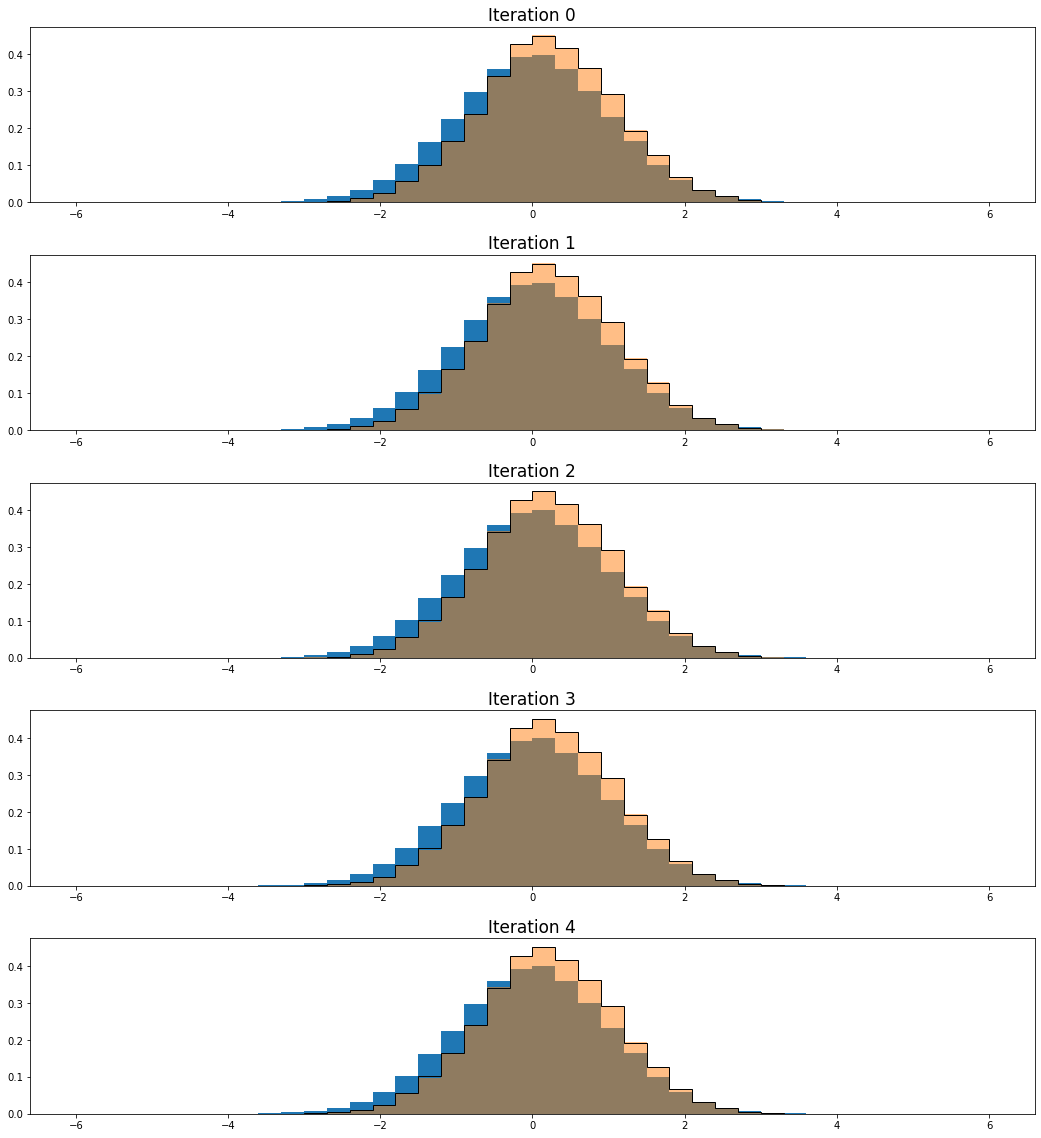

In [18]:


fig,ax = plt.subplots( of_niter, ndim, figsize=(18,4*of_niter))

hmin=-6
hmax=6
hbins=40

hist_data_mc_ofweighted = np.zeros( shape=(of_niter,ndim,hbins))
hist_data_truth         = np.zeros( shape=(of_niter,ndim,hbins))

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

do_renorm = True


for ofi in range(0,of_niter) :

    if do_renorm :
        
        for di in range(ndim) :
            
            if ndim > 1 :
                thisax = ax[ofi][di]
            else :
                thisax = ax[ofi]
            
            thisax.hist( train_pts[:,di], bins=hbins, density=True, range=[hmin,hmax], label='train particle' )
            hist_data_mc_ofweighted[ofi,di],_,_ = thisax.hist( train_pts[:,di], weights=push_weights[ofi], bins=hbins, density=True, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )            
            hist_data_truth[ofi,di],_,_ =         thisax.hist( true_pts[:,di], bins=hbins, density=True, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

            #hist_data_truth[ofi,di],_,_ =         thisax.hist( true_pts10x[:,di], weights=true_pts10x_weights, bins=hbins, density=True, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

    else :
        
        for di in range(ndim) :

            if ndim > 1 :
                thisax = ax[ofi][di]
            else :
                thisax = ax[ofi]
                
            hist_data_mc_ofweighted[ofi,di],_,_ = thisax.hist( train_pts[:,di], weights=push_weights_scaled[ofi], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )            
            hist_data_truth[ofi,di],_,_ =         thisax.hist( true_pts[:,di], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )
        
            #hist_data_truth[ofi,di],_,_ =         thisax.hist( true_pts10x[:,di], weights=true_pts10x_weights, bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )
        

    

 
    if ndim > 1 :
        thisax = ax[ofi][0]
    else :
        thisax = ax[ofi]
        
    thisax.set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

In [19]:
hist_data_diff = hist_data_mc_ofweighted - hist_data_truth
hist_data_diff2 = hist_data_diff * hist_data_diff

hist_data_sum_diff2 = np.zeros( shape=(of_niter,ndim))

for ofi in range( of_niter ) :
    for di in range( ndim ) :
        hist_data_sum_diff2[ofi,di] = np.sum( hist_data_diff2[ofi,di])


<function matplotlib.pyplot.show(close=None, block=None)>

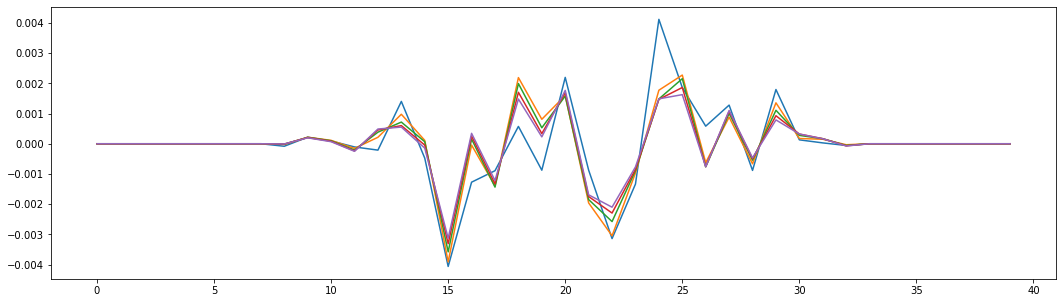

In [20]:
fig,ax = plt.subplots( 1, ndim, figsize=(18,5))

for ofi in range(of_niter) :
    for di in range( ndim ) :
        if ndim > 1 :
            thisax = ax[di]
        else :
            thisax = ax
        thisax.plot(hist_data_diff[ofi,di])

    
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

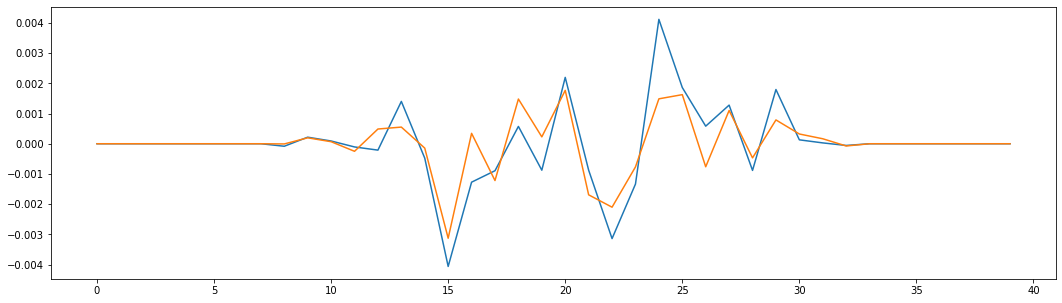

In [21]:
fig,ax = plt.subplots( 1, ndim, figsize=(18,5))

ofi = 0
for di in range( ndim ) :
    if ndim > 1 :
        thisax = ax[di]
    else :
        thisax = ax
    thisax.plot(hist_data_diff[ofi,di])

ofi = of_niter-1
for di in range( ndim ) :
    if ndim > 1 :
        thisax = ax[di]
    else :
        thisax = ax
    thisax.plot(hist_data_diff[ofi,di])
    
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

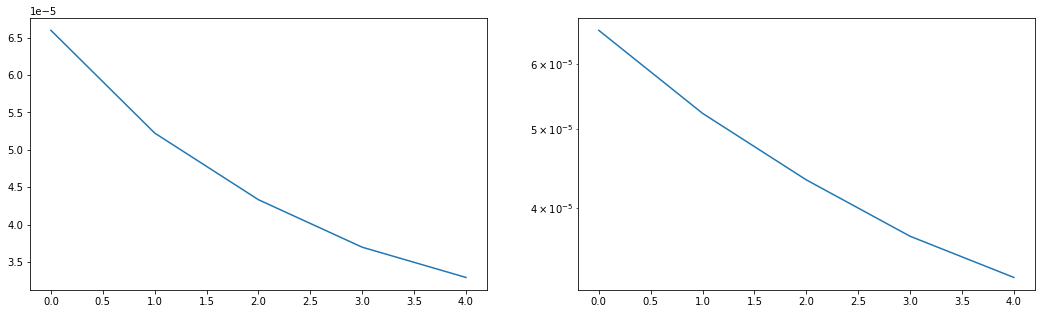

In [22]:
fig,ax = plt.subplots( 1, 2, figsize=(18,5))
ax[0].plot( hist_data_sum_diff2)
ax[1].plot( hist_data_sum_diff2)
ax[1].set_yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

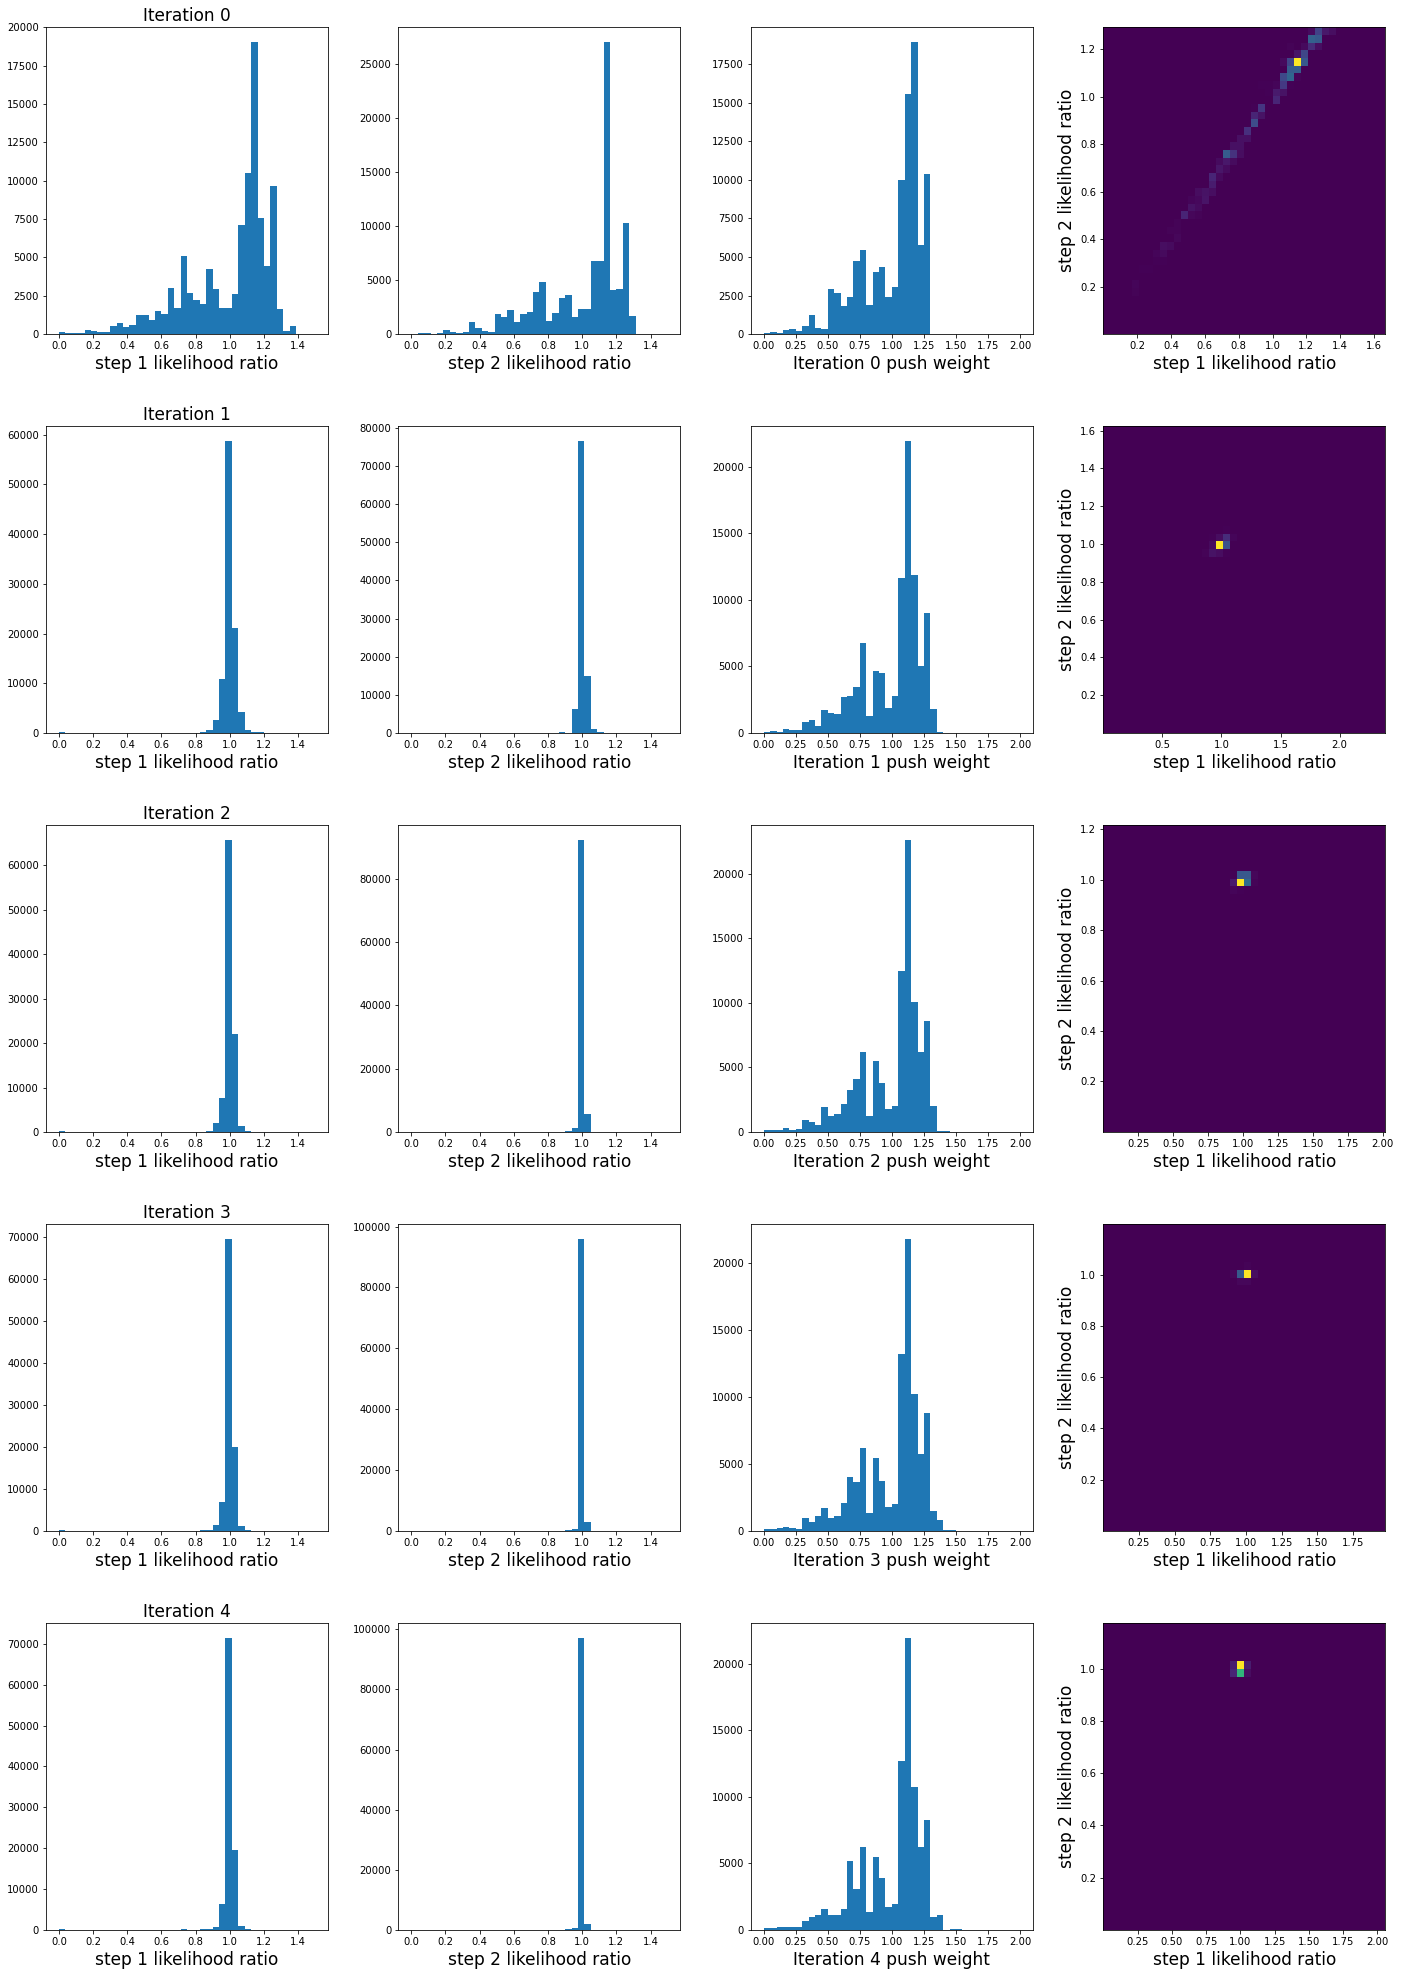

In [23]:
fig,ax = plt.subplots( of_niter, 4, figsize=(24,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins, range=[0.,1.5] )
    
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins, range=[0.,1.5] )
    
    ax[ofi][2].hist( push_weights[ofi,:], bins=hbins, range=[0.,2.0] )
    #ax[ofi][2].hist( calc_weight, bins=hbins, range=[0.,2.0], alpha=0.5 )
    
    
    ax[ofi][3].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 likelihood ratio', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 likelihood ratio', fontsize=lfontsize )
    
    ax[ofi][3].set_xlabel( 'step 1 likelihood ratio', fontsize=lfontsize )
    ax[ofi][3].set_ylabel( 'step 2 likelihood ratio', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'Iteration %d push weight' % ofi, fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

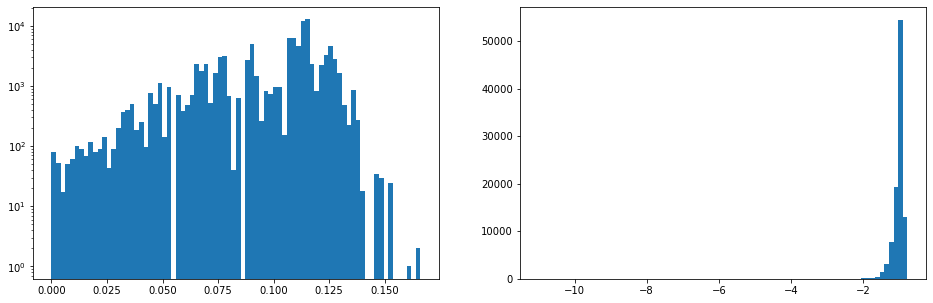

In [24]:
fig,ax = plt.subplots( 1, 2, figsize=(8*2,5))

hbins=80

final_push_weights_scaled = np.clip( final_push_weights_scaled, 1e-11, 1e11)

ax[0].hist( final_push_weights_scaled, bins=hbins)
ax[0].set_yscale('log')

ax[1].hist( np.log10(final_push_weights_scaled), bins=hbins)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

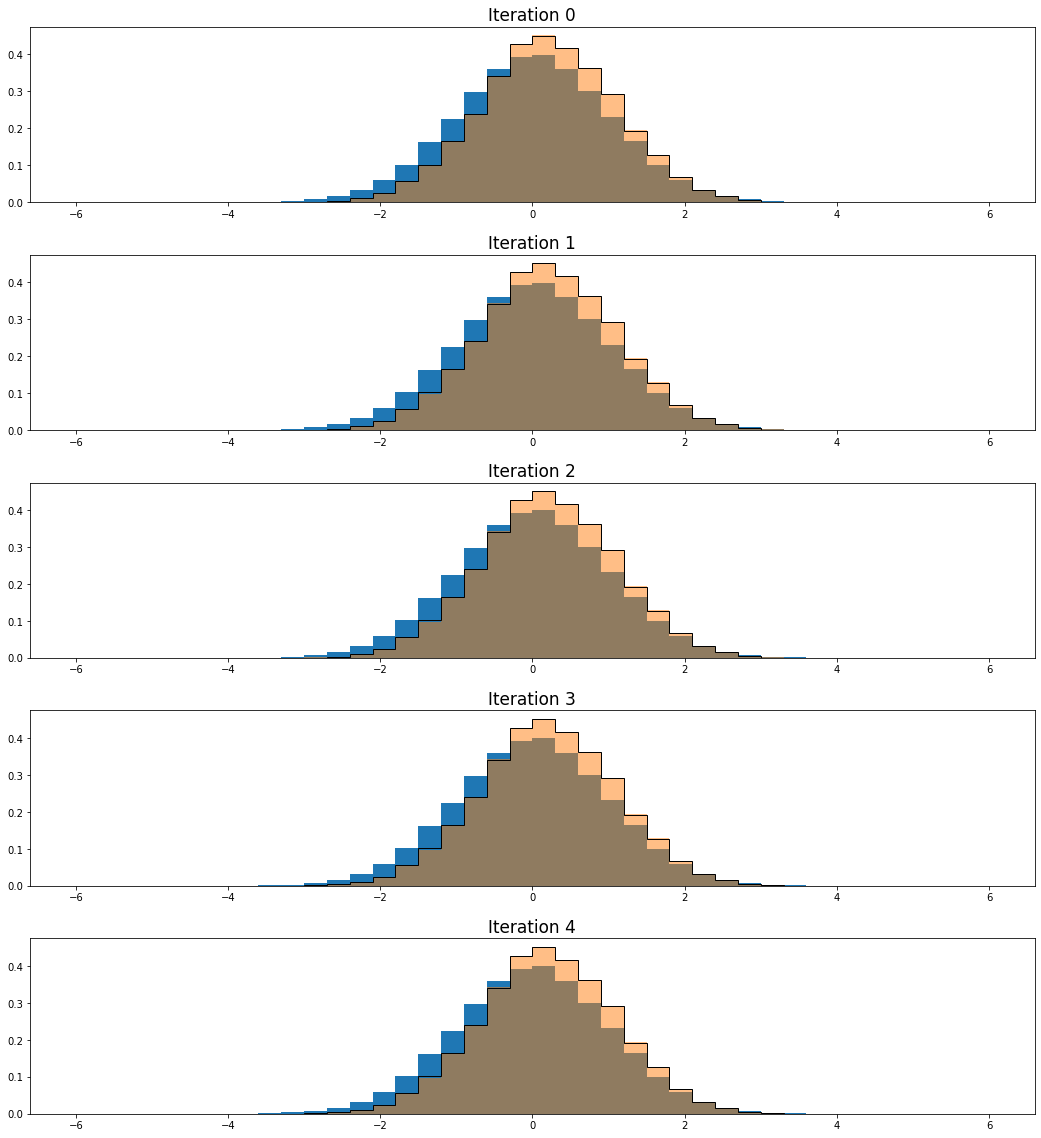

In [25]:

fig,ax = plt.subplots( of_niter, ndim, figsize=(18,4*of_niter))

hmin=-6
hmax=6
hbins=40

det_hist_data_mc_ofweighted = np.zeros( shape=(of_niter,ndim,hbins))
det_hist_data_truth         = np.zeros( shape=(of_niter,ndim,hbins))

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

do_renorm = True


for ofi in range(0,of_niter) :

    if do_renorm :
        
        for di in range(ndim) :
            
            if ndim > 1 :
                thisax = ax[ofi][di]
            else :
                thisax = ax[ofi]
            
            thisax.hist( train_det_pts[:,di], bins=hbins, density=True, range=[hmin,hmax], label='train particle' )
            det_hist_data_mc_ofweighted[ofi,di],_,_ = thisax.hist( train_det_pts[:,di], weights=push_weights[ofi], bins=hbins, density=True, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
            det_hist_data_truth[ofi,di],_,_ =         thisax.hist( true_det_pts[:,di], bins=hbins, density=True, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

            #det_hist_data_truth[ofi,di],_,_ =         thisax.hist( true_det_pts10x[:,di], weights=true_pts10x_weights, bins=hbins, density=True, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

            
    else :
        
        for di in range(ndim) :

            if ndim > 1 :
                thisax = ax[ofi][di]
            else :
                thisax = ax[ofi]
        
            det_hist_data_mc_ofweighted[ofi,di],_,_ = thisax.hist( train_det_pts[:,di], weights=push_weights_scaled[ofi], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
            det_hist_data_truth[ofi,di],_,_ =         thisax.hist( true_det_pts[:,di], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )
            
            #det_hist_data_truth[ofi,di],_,_ =         thisax.hist( true_det_pts10x[:,di], weights=true_pts10x_weights, bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )
        

    

    
    if ndim > 1 :
        thisax = ax[ofi][0]
    else :
        thisax = ax[ofi]
    
    thisax.set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

In [26]:
det_hist_data_diff = det_hist_data_mc_ofweighted - det_hist_data_truth
det_hist_data_diff2 = det_hist_data_diff * det_hist_data_diff

det_hist_data_sum_diff2 = np.zeros( shape=(of_niter,ndim))

for ofi in range( of_niter ) :
    for di in range( ndim ) :
        det_hist_data_sum_diff2[ofi,di] = np.sum( det_hist_data_diff2[ofi,di])


<function matplotlib.pyplot.show(close=None, block=None)>

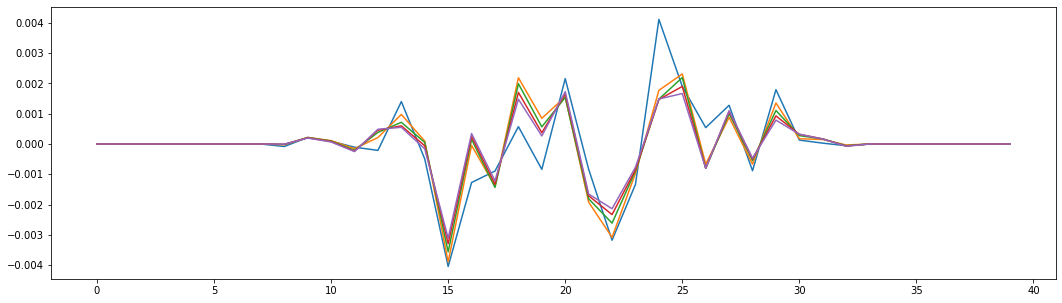

In [27]:
fig,ax = plt.subplots( 1, ndim, figsize=(18,5))

for ofi in range(of_niter) :
    for di in range( ndim ) :
        if ndim > 1 :
            thisax = ax[di]
        else :
            thisax = ax
        thisax.plot(det_hist_data_diff[ofi,di])

    
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

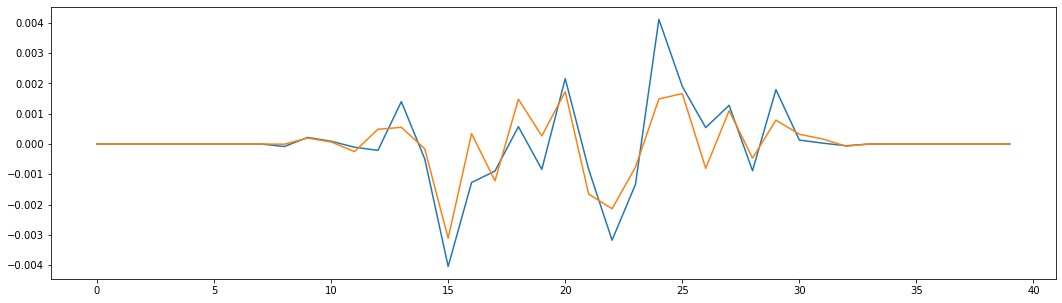

In [28]:
fig,ax = plt.subplots( 1, ndim, figsize=(18,5))

ofi = 0
for di in range( ndim ) :
    if ndim > 1 :
        thisax = ax[di]
    else :
        thisax = ax
    thisax.plot(det_hist_data_diff[ofi,di])

ofi = of_niter-1
for di in range( ndim ) :
    if ndim > 1 :
        thisax = ax[di]
    else :
        thisax = ax
    thisax.plot(det_hist_data_diff[ofi,di])

    
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

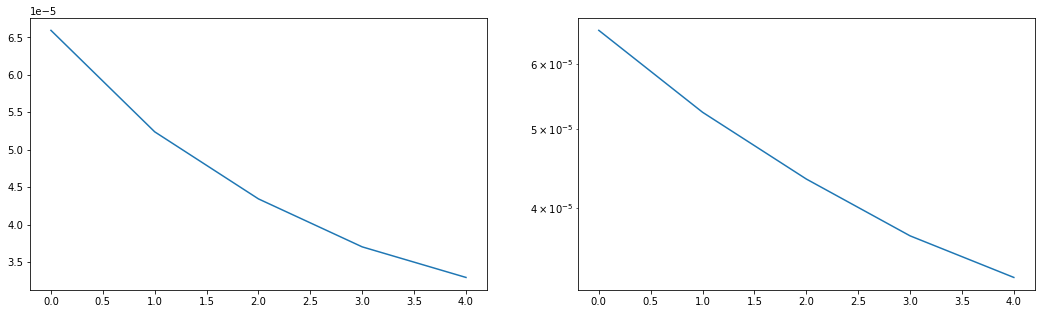

In [29]:
fig,ax = plt.subplots( 1, 2, figsize=(18,5))
ax[0].plot( det_hist_data_sum_diff2)
ax[1].plot( det_hist_data_sum_diff2)
ax[1].set_yscale('log')
plt.show

In [30]:
step1_mean = np.zeros( of_niter )
step1_rms = np.zeros( of_niter )

step2_mean = np.zeros( of_niter )
step2_rms = np.zeros( of_niter )

iter_val = np.zeros( of_niter )

for ofi in range( of_niter ) :
    
    iter_val[ofi] = ofi
    
    step1_mean[ofi] = np.mean( of_weights[ofi,0,:] )
    step1_rms[ofi] = np.sqrt( np.var( of_weights[ofi,0,:]))
    
    step2_mean[ofi] = np.mean( of_weights[ofi,1,:] )
    step2_rms[ofi] = np.sqrt( np.var( of_weights[ofi,1,:]))
    
    print("  iter %2d : step 1 mean  %.3f  rms %.3f      step 2 mean  %.3f  rms %.3f" % 
          (ofi, step1_mean[ofi], step1_rms[ofi], step2_mean[ofi], step2_rms[ofi]) )

  iter  0 : step 1 mean  0.998  rms 0.246      step 2 mean  0.998  rms 0.244
  iter  1 : step 1 mean  0.999  rms 0.055      step 2 mean  1.000  rms 0.028
  iter  2 : step 1 mean  0.999  rms 0.048      step 2 mean  0.999  rms 0.021
  iter  3 : step 1 mean  0.999  rms 0.046      step 2 mean  0.999  rms 0.018
  iter  4 : step 1 mean  0.999  rms 0.044      step 2 mean  0.999  rms 0.017


<function matplotlib.pyplot.show(close=None, block=None)>

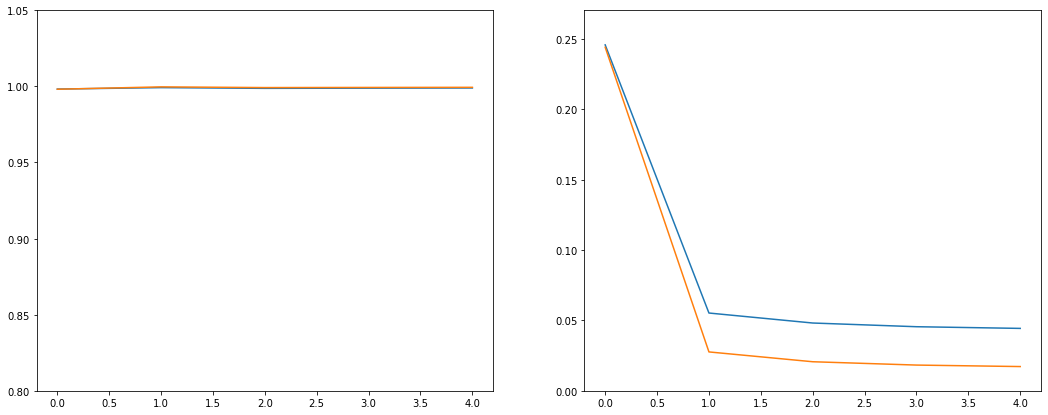

In [31]:
fig,ax = plt.subplots( 1, 2, figsize=(18,7))

ax[0].plot( iter_val, step1_mean )
ax[0].plot( iter_val, step2_mean )
ax[0].set_ylim( 0.80, 1.05)

ax[1].plot( iter_val, step1_rms )
ax[1].plot( iter_val, step2_rms )
ax[1].set_ylim( 0, 1.1*np.max(step1_rms))


plt.show

In [32]:

verbose = False



import gc

In [33]:
%%time

rng = np.random.default_rng()

for bi in range(0,n_samples) :

    print('\n\n\n ==== processing sample %6d' % bi )
        
    rd = read_sample( input_dir, bi )

    ngen_true = rd['ngen_true']
    ngen_train = rd['ngen_train']

    true_pts = rd['true_pts']
    true_det_pts = rd['true_det_pts']
    train_pts = rd['train_pts']
    train_det_pts = rd['train_det_pts']
    
    train_both = np.stack([train_pts, train_det_pts], axis=1)
        
    
    rd = hist_pdf_omnifold1a( train_both, true_det_pts, of_niter, 0 )
    
    
    
    mc_weight_sf = (1.*len(true_det_pts))/(1.*len(train_both))



    boot_final_push_weights = rd["final_push_weights"]
    boot_final_push_weights_scaled = boot_final_push_weights
    boot_final_push_weights_scaled = mc_weight_sf * boot_final_push_weights
    
    print("\n\n bootstrap %d final push weights scaled:" % bi)
    print( boot_final_push_weights_scaled )

     
    with open( '%s/bootstrap-weights-%03d.npy' % ( output_dir, bi ), 'wb' ) as f :
        np.save( f, boot_final_push_weights_scaled )
        
    del boot_final_push_weights_scaled
    del rd
    gc.collect()
    
    




 ==== processing sample      0
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.89192547 1.23217959 1.12982361 ... 0.57405672 0.40225785 1.08868432]
 weights_push at the beginning
[0.89385571 1.25368542 1.12831277 ... 0.58993435 0.3866758  1.08842965]
 weights_push at the beginning
[0.89161061 1.27918939 1.12749526 ... 0.59310194 0.37704662 1.08497697]
 weights_push at the beginning
[0.88851965 1.30050187 1.12672872 ... 0.59323041 0.37098094 1.0832116 ]


 bootstrap 0 final push weights scaled:
[0.08853564 0.13185336 0.11256821 ... 0.05923948 0.03664333 0.108274  ]



 ==== processing sample      1
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.5400938  1.00431122 1.14830605 ... 0.84329798 1.19234971 1.09839845]
 weights_push at the beginning
[0.5343986  1.00492479 1.15514586 ... 0.83349598 1.19991088 1.0853253 ]
 weights_push at the beginning
[0.53474497 1.00394388 1.16091717 ... 0.82889641 1.2011057 




 ==== processing sample     14
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.13751815 0.65215642 0.66226584 ... 0.69878385 1.27987143 1.19564143]
 weights_push at the beginning
[1.11914652 0.64772123 0.64691516 ... 0.69546526 1.27169281 1.17768112]
 weights_push at the beginning
[1.12373442 0.64153415 0.63473859 ... 0.69396774 1.26188269 1.17485592]
 weights_push at the beginning
[1.13578187 0.63595609 0.62573026 ... 0.69418211 1.25449059 1.17345258]


 bootstrap 14 final push weights scaled:
[0.11503394 0.06312381 0.06188489 ... 0.06951868 0.1249033  0.11711236]



 ==== processing sample     15
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.13896494 1.13896494 0.97815469 ... 0.79710086 0.80973411 1.2131266 ]
 weights_push at the beginning
[1.1559217  1.1559217  0.99472275 ... 0.78565941 0.80156126 1.2168292 ]
 weights_push at the beginning
[1.16442361 1.16442361 1.00273723 ... 0.77479425 0.7952660




 ==== processing sample     28
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.92050629 0.86042915 0.30284333 ... 0.59924148 0.6960966  1.0870067 ]
 weights_push at the beginning
[0.92582782 0.87970681 0.31827247 ... 0.61017593 0.69515525 1.10306851]
 weights_push at the beginning
[0.93176452 0.88805638 0.32708421 ... 0.61505819 0.69587605 1.10427487]
 weights_push at the beginning
[0.93688079 0.89275596 0.33450057 ... 0.61941058 0.69690953 1.10346827]


 bootstrap 28 final push weights scaled:
[0.09407752 0.08957473 0.03410484 ... 0.06237864 0.06977737 0.11029489]



 ==== processing sample     29
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.283684   0.90746359 0.25460573 ... 0.88845137 0.79996256 0.68933046]
 weights_push at the beginning
[1.26573077 0.90304574 0.24169506 ... 0.90000699 0.79573127 0.6972213 ]
 weights_push at the beginning
[1.25377929 0.89856237 0.22820692 ... 0.90751862 0.7933697




 ==== processing sample     42
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.75030266 0.91575043 0.92934887 ... 0.64575293 1.17806173 1.10892706]
 weights_push at the beginning
[0.76125561 0.9163113  0.93156975 ... 0.63655849 1.17423034 1.11878237]
 weights_push at the beginning
[0.76826413 0.91448484 0.92996402 ... 0.63017093 1.17018151 1.12153008]
 weights_push at the beginning
[0.77359267 0.91333822 0.92853859 ... 0.62547935 1.16756728 1.12064426]


 bootstrap 42 final push weights scaled:
[0.07779938 0.09126719 0.09274345 ... 0.06214258 0.11655607 0.11181625]



 ==== processing sample     43
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.06956238 0.58689746 1.18747051 ... 0.81062513 0.87396248 1.24588399]
 weights_push at the beginning
[1.07709217 0.57712164 1.19562174 ... 0.80605989 0.87336663 1.23904706]
 weights_push at the beginning
[1.07953728 0.57109269 1.20165915 ... 0.80369884 0.8730906




 ==== processing sample     56
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.99386623 1.25038062 1.24964938 ... 0.81009653 1.01146029 0.93016961]
 weights_push at the beginning
[1.00539305 1.26011837 1.25447363 ... 0.80202926 1.01174985 0.92222197]
 weights_push at the beginning
[1.01310203 1.26853202 1.25832918 ... 0.79275917 1.01096269 0.91945599]
 weights_push at the beginning
[1.01814412 1.27640716 1.26120297 ... 0.78599726 1.01049755 0.91881453]


 bootstrap 56 final push weights scaled:
[0.10216176 0.12831902 0.12627145 ... 0.07812516 0.10107878 0.0918847 ]



 ==== processing sample     57
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.13167297 1.15373243 0.83358569 ... 1.08641823 1.13983374 1.11259989]
 weights_push at the beginning
[1.12413569 1.1344585  0.81156603 ... 1.09774036 1.14246306 1.11626839]
 weights_push at the beginning
[1.12113755 1.12179822 0.81304379 ... 1.10222259 1.1444652




 ==== processing sample     70
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.09706308 0.54672894 1.27999125 ... 0.97303096 1.21067342 0.60098741]
 weights_push at the beginning
[1.07984045 0.53588238 1.30032838 ... 0.98653926 1.20942082 0.60877182]
 weights_push at the beginning
[1.08397825 0.53090994 1.31398131 ... 0.99177568 1.20798156 0.61547548]
 weights_push at the beginning
[1.09276526 0.52934148 1.32459546 ... 0.99570723 1.2076629  0.62134154]


 bootstrap 70 final push weights scaled:
[0.11028923 0.05293757 0.13333295 ... 0.09991853 0.12077217 0.06259486]



 ==== processing sample     71
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.76786144 0.58172044 1.14696171 ... 1.16255171 1.17787596 0.70943314]
 weights_push at the beginning
[0.76791528 0.58849072 1.13136831 ... 1.14944343 1.20297085 0.70605288]
 weights_push at the beginning
[0.76941223 0.58968203 1.11883483 ... 1.15330421 1.2239091




 ==== processing sample     84
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.01805395 1.09713512 1.03997507 ... 1.16333191 0.69939335 1.13796662]
 weights_push at the beginning
[1.038778   1.06172372 1.05657952 ... 1.1549907  0.69426259 1.11964063]
 weights_push at the beginning
[1.04583933 1.04687877 1.06013421 ... 1.15097744 0.69024258 1.10928894]
 weights_push at the beginning
[1.04909625 1.03483233 1.06093767 ... 1.14897677 0.68805318 1.10315982]


 bootstrap 84 final push weights scaled:
[0.1051158  0.10237575 0.10611505 ... 0.11477377 0.06869325 0.10991572]



 ==== processing sample     85
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.82224199 1.19862651 1.07968328 ... 1.10487382 1.18502491 1.26833613]
 weights_push at the beginning
[0.83078896 1.18501024 1.07356119 ... 1.09751538 1.18536169 1.28863507]
 weights_push at the beginning
[0.83542106 1.178398   1.06829583 ... 1.09494898 1.1908639




 ==== processing sample     98
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.20953572 0.9767749  1.14959737 ... 1.2313543  0.51378739 0.85038256]
 weights_push at the beginning
[1.19884564 0.96368604 1.15033686 ... 1.24171817 0.50746793 0.84858794]
 weights_push at the beginning
[1.19434518 0.95803138 1.15243883 ... 1.24525487 0.50147756 0.84533994]
 weights_push at the beginning
[1.19140295 0.95574152 1.15721313 ... 1.2455163  0.49554497 0.84264419]


 bootstrap 98 final push weights scaled:
[0.11898562 0.09547776 0.11631846 ... 0.12446605 0.04898864 0.08401001]



 ==== processing sample     99
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.05719981 0.96300294 1.1442992  ... 1.07295034 1.23436506 1.13904702]
 weights_push at the beginning
[1.05388826 0.96915149 1.13436655 ... 1.06724747 1.2339269  1.13165265]
 weights_push at the beginning
[1.05030501 0.97022293 1.12846009 ... 1.06296123 1.2362436




 ==== processing sample    112
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.0938158  1.25107935 1.10355676 ... 0.90233637 1.27699912 0.99127673]
 weights_push at the beginning
[1.07933307 1.24319313 1.10351793 ... 0.91126171 1.27217018 1.02304509]
 weights_push at the beginning
[1.07239767 1.24533412 1.10379677 ... 0.91010826 1.26728413 1.03536989]
 weights_push at the beginning
[1.06834872 1.24962423 1.10408425 ... 0.90781549 1.26328343 1.04290446]


 bootstrap 112 final push weights scaled:
[0.10656221 0.12539773 0.1104319  ... 0.09055924 0.12601595 0.10484319]



 ==== processing sample    113
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.25688973 1.1954426  1.02023498 ... 1.13333391 1.05259109 1.2488103 ]
 weights_push at the beginning
[1.23778096 1.17885675 1.0177617  ... 1.1480476  1.05106216 1.25853794]
 weights_push at the beginning
[1.22904883 1.17431813 1.01673475 ... 1.1582066  1.050999




 ==== processing sample    126
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.18214767 1.02987383 0.8619092  ... 0.87521406 1.04581597 0.9212427 ]
 weights_push at the beginning
[1.18603089 1.03037841 0.87410282 ... 0.87165212 1.03830216 0.91996263]
 weights_push at the beginning
[1.18728106 1.03047718 0.87822518 ... 0.86316696 1.03517554 0.91698105]
 weights_push at the beginning
[1.18876376 1.03064575 0.88056682 ... 0.85516851 1.03370293 0.91472192]


 bootstrap 126 final push weights scaled:
[0.11903796 0.1030832  0.08823994 ... 0.08480224 0.10329291 0.09125884]



 ==== processing sample    127
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.25507344 1.08227509 1.11553502 ... 1.08078042 1.27583423 1.17514219]
 weights_push at the beginning
[1.25283013 1.08544845 1.06980822 ... 1.09941491 1.25861174 1.18246871]
 weights_push at the beginning
[1.25323353 1.08328178 1.04796549 ... 1.11006526 1.246386




 ==== processing sample    140
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.17363626 1.06524677 1.18032551 ... 0.89442579 1.22146736 0.61618946]
 weights_push at the beginning
[1.16296337 1.05904108 1.18748144 ... 0.89450296 1.20509819 0.62511194]
 weights_push at the beginning
[1.16111863 1.05935535 1.19112687 ... 0.89443721 1.20126906 0.62676792]
 weights_push at the beginning
[1.16189008 1.05753727 1.19155881 ... 0.89572463 1.19986453 0.62605823]


 bootstrap 140 final push weights scaled:
[0.11635264 0.10551774 0.11903084 ... 0.08978298 0.11985559 0.062441  ]



 ==== processing sample    141
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.89607908 1.15798336 1.04724375 ... 1.17872445 1.28281999 0.85946077]
 weights_push at the beginning
[0.90264558 1.15445465 1.04599688 ... 1.18275542 1.29947595 0.82772391]
 weights_push at the beginning
[0.90302722 1.15853745 1.04524064 ... 1.18719199 1.306167




 ==== processing sample    154
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.60160942 0.33375882 1.22527347 ... 1.23517415 0.5950169  1.06584191]
 weights_push at the beginning
[0.604809   0.36952954 1.22028159 ... 1.25292329 0.59855001 1.06640054]
 weights_push at the beginning
[0.60460867 0.39805428 1.21430437 ... 1.26226207 0.59882981 1.06751294]
 weights_push at the beginning
[0.6033124  0.42094976 1.20919874 ... 1.26891968 0.59807077 1.06806154]


 bootstrap 154 final push weights scaled:
[0.06014726 0.04396538 0.12048268 ... 0.12742718 0.05967695 0.10680092]



 ==== processing sample    155
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.82350211 1.13178788 0.99289205 ... 1.13070172 0.85970587 1.01965576]
 weights_push at the beginning
[0.83898574 1.12092822 0.99651401 ... 1.11790776 0.86437337 1.01776212]
 weights_push at the beginning
[0.84702866 1.11357446 0.99614581 ... 1.10985725 0.862759




 ==== processing sample    168
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.90958566 1.00543875 1.01383058 ... 1.2240571  0.38915406 1.15379984]
 weights_push at the beginning
[0.91390414 1.01697325 1.01334766 ... 1.23036708 0.36898064 1.15535063]
 weights_push at the beginning
[0.92004128 1.02450001 1.01091428 ... 1.23722512 0.35777356 1.15844541]
 weights_push at the beginning
[0.92613651 1.03147357 1.00932505 ... 1.24224952 0.35036679 1.16188871]


 bootstrap 168 final push weights scaled:
[0.09313945 0.10385811 0.10084868 ... 0.12464756 0.03451163 0.11650109]



 ==== processing sample    169
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.1792584  1.24771764 0.95621788 ... 1.26181433 0.89557977 1.11853779]
 weights_push at the beginning
[1.16945897 1.24196459 0.97848763 ... 1.26814315 0.89634256 1.1149114 ]
 weights_push at the beginning
[1.17157055 1.23357391 0.99073031 ... 1.26549972 0.891263




 ==== processing sample    182
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.86719426 0.79525037 1.02125481 ... 1.11040671 0.70131133 1.14688405]
 weights_push at the beginning
[0.87817917 0.78460728 1.0217464  ... 1.10657833 0.69692307 1.14582843]
 weights_push at the beginning
[0.88485353 0.78035966 1.02262279 ... 1.10405101 0.68939984 1.14495139]
 weights_push at the beginning
[0.88896508 0.77938071 1.02406948 ... 1.10203422 0.6839317  1.14379863]


 bootstrap 182 final push weights scaled:
[0.08911496 0.0780025  0.10256801 ... 0.11002599 0.06804959 0.11424465]



 ==== processing sample    183
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.75851789 1.11775811 1.11775811 ... 0.91538777 1.08080086 1.01432118]
 weights_push at the beginning
[0.75495519 1.10109904 1.10109904 ... 0.92908654 1.07089178 1.0178291 ]
 weights_push at the beginning
[0.7493249  1.09375549 1.09375549 ... 0.93535224 1.066391




 ==== processing sample    196
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.07081607 1.08142087 1.1781904  ... 0.48808943 1.16421921 1.14257597]
 weights_push at the beginning
[1.08515379 1.08089362 1.17878991 ... 0.48796935 1.15591536 1.12588172]
 weights_push at the beginning
[1.08634454 1.08439233 1.17915822 ... 0.48815972 1.15505518 1.12063351]
 weights_push at the beginning
[1.08419147 1.08733342 1.17973774 ... 0.48717268 1.15693743 1.11646037]


 bootstrap 196 final push weights scaled:
[0.10809234 0.10890282 0.11803767 ... 0.04852743 0.11597855 0.11137582]



 ==== processing sample    197
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.22028848 1.12035361 1.27652083 ... 1.2827153  0.43843555 0.928592  ]
 weights_push at the beginning
[1.22843098 1.12518629 1.27270191 ... 1.29703108 0.44078564 0.9234145 ]
 weights_push at the beginning
[1.23195432 1.125966   1.27261494 ... 1.3059778  0.444632




 ==== processing sample    210
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.18734775 0.57079055 1.22230404 ... 1.2448576  1.28312183 0.86406355]
 weights_push at the beginning
[1.17975856 0.56119619 1.23514763 ... 1.25963157 1.28185351 0.87370124]
 weights_push at the beginning
[1.17848786 0.55507105 1.2393197  ... 1.26672841 1.27935755 0.87612877]
 weights_push at the beginning
[1.17440435 0.55131556 1.23950624 ... 1.27130528 1.27653796 0.87673904]


 bootstrap 210 final push weights scaled:
[0.11689136 0.05490014 0.12381005 ... 0.12752104 0.12743869 0.087607  ]



 ==== processing sample    211
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.70206996 1.00369733 1.2170354  ... 1.05142849 1.13867362 0.88146983]
 weights_push at the beginning
[0.69219656 1.00969355 1.22912354 ... 1.03634527 1.12731639 0.87198963]
 weights_push at the beginning
[0.68456766 1.01024193 1.23632766 ... 1.02763349 1.122113




 ==== processing sample    224
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.80134729 0.87486537 1.02663631 ... 1.03766931 1.26622853 0.61125598]
 weights_push at the beginning
[0.79584106 0.88251541 1.02084897 ... 1.02839619 1.27802415 0.61136431]
 weights_push at the beginning
[0.79071942 0.88866351 1.01769806 ... 1.02336192 1.28472273 0.61433397]
 weights_push at the beginning
[0.78679624 0.89398585 1.01649039 ... 1.02063575 1.29025929 0.61651616]


 bootstrap 224 final push weights scaled:
[0.07834875 0.08986114 0.10163048 ... 0.1018989  0.129542   0.06173141]



 ==== processing sample    225
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.21845884 1.16114673 0.68141767 ... 1.21883758 1.22616597 1.19766782]
 weights_push at the beginning
[1.20257972 1.16026342 0.68131239 ... 1.21178183 1.23164321 1.21222222]
 weights_push at the beginning
[1.19393157 1.16291738 0.68321183 ... 1.21148433 1.232516




 ==== processing sample    238
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.71441834 1.02583307 1.25853424 ... 1.09602513 1.10241079 0.85111684]
 weights_push at the beginning
[0.71979228 0.99372443 1.24586505 ... 1.09136222 1.09782937 0.85786308]
 weights_push at the beginning
[0.71827093 0.96100582 1.23614658 ... 1.08937854 1.09742294 0.85889643]
 weights_push at the beginning
[0.71608475 0.93635725 1.23002821 ... 1.08967496 1.09850439 0.85793392]


 bootstrap 238 final push weights scaled:
[0.07139214 0.09199683 0.12261281 ... 0.10910743 0.109982   0.08564065]



 ==== processing sample    239
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.00433153 1.06070001 1.1648062  ... 1.1475494  1.17155097 1.06877693]
 weights_push at the beginning
[1.00696204 1.05110833 1.16254218 ... 1.15723152 1.16739433 1.06930968]
 weights_push at the beginning
[1.00413537 1.04431103 1.16316754 ... 1.16203466 1.167987




 ==== processing sample    252
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.21024269 1.14295883 1.07364252 ... 1.02773057 1.12994986 1.26899877]
 weights_push at the beginning
[1.2134807  1.14958242 1.07604952 ... 1.03428517 1.11279551 1.2793488 ]
 weights_push at the beginning
[1.22074966 1.15049716 1.09125257 ... 1.03285206 1.10564698 1.2768128 ]
 weights_push at the beginning
[1.22481509 1.14940414 1.10447952 ... 1.03058674 1.10230923 1.27137122]


 bootstrap 252 final push weights scaled:
[0.12263247 0.11476112 0.11148422 ... 0.10287704 0.1100653  0.12660878]



 ==== processing sample    253
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.19275706 1.03594688 0.87283086 ... 1.13117631 1.1510006  1.23492691]
 weights_push at the beginning
[1.19570051 1.0399122  0.87900569 ... 1.14302208 1.14523891 1.26096311]
 weights_push at the beginning
[1.19749465 1.04266655 0.87979333 ... 1.14740724 1.143063




 ==== processing sample    266
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.88173764 0.83802741 1.13039792 ... 0.55560894 0.55308223 1.09743898]
 weights_push at the beginning
[0.88946461 0.84541478 1.11412445 ... 0.57274358 0.54160119 1.10531904]
 weights_push at the beginning
[0.89098773 0.84660262 1.11293205 ... 0.58086731 0.5369176  1.11048332]
 weights_push at the beginning
[0.89170855 0.84654258 1.11205364 ... 0.5850751  0.53584617 1.11476758]


 bootstrap 266 final push weights scaled:
[0.08923282 0.08462871 0.11105532 ... 0.05872745 0.05365973 0.11185099]



 ==== processing sample    267
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.12520088 0.9728301  1.19163705 ... 1.18585007 1.1918591  1.08386785]
 weights_push at the beginning
[1.12175152 0.98630552 1.17660933 ... 1.17219304 1.20335663 1.05826645]
 weights_push at the beginning
[1.11972162 0.99186726 1.17282574 ... 1.16861582 1.207622




 ==== processing sample    280
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.24588739 1.10154477 1.15053456 ... 0.78652314 1.24607922 0.90090291]
 weights_push at the beginning
[1.2419583  1.12148607 1.15195065 ... 0.78908593 1.24176519 0.88976744]
 weights_push at the beginning
[1.24131025 1.12751128 1.15455151 ... 0.78835075 1.24026831 0.888314  ]
 weights_push at the beginning
[1.2403676  1.1302458  1.15680615 ... 0.78774539 1.2381221  0.88870225]


 bootstrap 280 final push weights scaled:
[0.1239389  0.11322366 0.11583226 ... 0.07875362 0.12351171 0.08893444]



 ==== processing sample    281
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.8650299  1.08844652 1.14454791 ... 1.1130012  1.08497404 0.70451526]
 weights_push at the beginning
[0.87659019 1.07529166 1.12171447 ... 1.11132248 1.08653076 0.72065367]
 weights_push at the beginning
[0.88126187 1.06966882 1.10874405 ... 1.11400154 1.084953




 ==== processing sample    294
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.6461087  1.12246885 0.81106281 ... 0.52666204 0.80578852 1.22142586]
 weights_push at the beginning
[0.65923166 1.12997388 0.80109128 ... 0.51679864 0.81034808 1.20627278]
 weights_push at the beginning
[0.66702504 1.13153142 0.79502092 ... 0.51082641 0.81336167 1.19381424]
 weights_push at the beginning
[0.67231891 1.13149275 0.79166463 ... 0.50777575 0.81623612 1.18078348]


 bootstrap 294 final push weights scaled:
[0.06765179 0.11313738 0.07896393 ... 0.05058499 0.081897   0.11686978]



 ==== processing sample    295
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.57033849 0.95262728 1.07607211 ... 0.40577707 0.37581602 0.88253117]
 weights_push at the beginning
[0.57634297 0.96114707 1.07575284 ... 0.40898359 0.37206264 0.8673581 ]
 weights_push at the beginning
[0.57804775 0.96793373 1.07226777 ... 0.41185797 0.368070




 ==== processing sample    308
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.1518648  1.27135204 1.1802454  ... 1.2090206  0.9426852  0.8850279 ]
 weights_push at the beginning
[1.13105085 1.26273975 1.17404326 ... 1.21431046 0.94511795 0.8797847 ]
 weights_push at the beginning
[1.1214124  1.2527458  1.16864823 ... 1.21964596 0.9471015  0.87629021]
 weights_push at the beginning
[1.11668757 1.24178414 1.16467683 ... 1.22240966 0.94894811 0.8738982 ]


 bootstrap 308 final push weights scaled:
[0.11141426 0.12314638 0.11620026 ... 0.12232033 0.09505732 0.08721028]



 ==== processing sample    309
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.18876121 0.6303126  1.11045049 ... 1.142172   0.84194522 1.10416671]
 weights_push at the beginning
[1.20015017 0.62959915 1.09838208 ... 1.12721441 0.82691977 1.13369434]
 weights_push at the beginning
[1.2053031  0.62557749 1.09349281 ... 1.13039651 0.820189




 ==== processing sample    322
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.94092692 0.51862489 1.17708255 ... 1.17608753 1.29455652 1.02641075]
 weights_push at the beginning
[0.93975545 0.51273689 1.18672311 ... 1.15899323 1.30484699 1.02057227]
 weights_push at the beginning
[0.93919873 0.50707716 1.20278805 ... 1.1524054  1.30536634 1.01651279]
 weights_push at the beginning
[0.94101963 0.50338517 1.21731101 ... 1.14916427 1.30257286 1.01359929]


 bootstrap 322 final push weights scaled:
[0.094387   0.05007565 0.12307149 ... 0.11472101 0.12992936 0.10113445]



 ==== processing sample    323
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.39236615 0.92631111 1.03612115 ... 0.70754069 0.9395894  1.1627365 ]
 weights_push at the beginning
[0.40762285 0.91908862 1.04837674 ... 0.6976339  0.93152333 1.1347519 ]
 weights_push at the beginning
[0.4145683  0.91653829 1.05458222 ... 0.6926081  0.928481




 ==== processing sample    336
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.73723182 0.90484189 1.1512269  ... 0.52050738 1.20621583 0.9133408 ]
 weights_push at the beginning
[0.74440645 0.90540684 1.14334804 ... 0.51350362 1.2058507  0.91579713]
 weights_push at the beginning
[0.75087156 0.90244215 1.13912309 ... 0.50864157 1.20995308 0.91477886]
 weights_push at the beginning
[0.75643998 0.90027958 1.13635576 ... 0.50621861 1.20950884 0.91431019]


 bootstrap 336 final push weights scaled:
[0.07610425 0.08986139 0.1134083  ... 0.05052186 0.12058169 0.09140971]



 ==== processing sample    337
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.85327752 1.2769459  0.75989418 ... 1.22776015 0.95743924 1.1739947 ]
 weights_push at the beginning
[0.8615629  1.27132523 0.75961198 ... 1.23199808 0.95328012 1.14520591]
 weights_push at the beginning
[0.86577198 1.25711271 0.75641178 ... 1.23025196 0.949731




 ==== processing sample    350
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.07809502 0.14107515 1.31079751 ... 1.23328851 1.16039524 1.36797267]
 weights_push at the beginning
[1.06046951 0.14760805 1.29518916 ... 1.2777326  1.17110361 1.3841565 ]
 weights_push at the beginning
[1.05348178 0.14430194 1.28424505 ... 1.3044259  1.17735448 1.38168004]
 weights_push at the beginning
[1.0498309  0.13886374 1.27951576 ... 1.3161644  1.17983204 1.37393577]


 bootstrap 350 final push weights scaled:
[0.10474556 0.01328776 0.12790243 ... 0.13214882 0.11804483 0.13654405]



 ==== processing sample    351
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.11123262 1.16252176 1.28003658 ... 1.07088675 1.27996023 1.11803528]
 weights_push at the beginning
[1.12310287 1.14204393 1.28437886 ... 1.08293096 1.27981048 1.10283844]
 weights_push at the beginning
[1.12680592 1.13668851 1.28307359 ... 1.08569447 1.277945




 ==== processing sample    364
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.73103255 1.29752587 1.0545887  ... 0.91397986 1.26622653 1.24385855]
 weights_push at the beginning
[0.74105324 1.31532705 1.00342255 ... 0.90934806 1.27386272 1.23605082]
 weights_push at the beginning
[0.7467662  1.32514598 0.9822206  ... 0.90456524 1.28159513 1.22871503]
 weights_push at the beginning
[0.75167087 1.32932444 0.96881659 ... 0.90002277 1.28698661 1.22287454]


 bootstrap 364 final push weights scaled:
[0.07559484 0.13308758 0.09587475 ... 0.08955903 0.12908838 0.12184411]



 ==== processing sample    365
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.43974775 1.12720161 1.17198802 ... 0.865764   1.21730799 1.1859331 ]
 weights_push at the beginning
[0.44778256 1.1287625  1.17773596 ... 0.87018764 1.19592141 1.18349516]
 weights_push at the beginning
[0.45536313 1.13022151 1.17966281 ... 0.87232897 1.179458




 ==== processing sample    378
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.95049036 1.24235355 0.60437243 ... 0.97811257 0.93540808 0.65197157]
 weights_push at the beginning
[0.95431048 1.25693284 0.61473735 ... 0.97123906 0.94195074 0.64859536]
 weights_push at the beginning
[0.95444256 1.25987239 0.61836699 ... 0.96839985 0.94467784 0.64591559]
 weights_push at the beginning
[0.95392237 1.25962189 0.62000167 ... 0.9677055  0.94757133 0.64452828]


 bootstrap 378 final push weights scaled:
[0.09528145 0.12581387 0.06210781 ... 0.09681059 0.09507351 0.06437534]



 ==== processing sample    379
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.45645545 1.2805567  0.74397647 ... 1.04148512 1.2805567  1.10127285]
 weights_push at the beginning
[0.47407889 1.27489175 0.75856246 ... 1.03125486 1.27489175 1.08804062]
 weights_push at the beginning
[0.48280073 1.26890726 0.76417098 ... 1.02971238 1.268907




 ==== processing sample    392
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.9688822  1.06766512 1.05350596 ... 0.68227804 0.95162324 0.84172293]
 weights_push at the beginning
[0.96275123 1.06261142 1.03997389 ... 0.68775853 0.95604919 0.8434458 ]
 weights_push at the beginning
[0.95866762 1.0670489  1.04002785 ... 0.68906922 0.95751395 0.84339129]
 weights_push at the beginning
[0.95709402 1.07138461 1.04269192 ... 0.68866092 0.95903153 0.84374259]


 bootstrap 392 final push weights scaled:
[0.09567691 0.10744669 0.10453407 ... 0.06873444 0.09606283 0.08440652]



 ==== processing sample    393
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.01076776 0.79501603 1.17666906 ... 1.17297682 0.63454887 0.72961044]
 weights_push at the beginning
[1.01011698 0.80846174 1.17334303 ... 1.17142371 0.65504186 0.72708685]
 weights_push at the beginning
[1.00735759 0.8151232  1.16839835 ... 1.16834945 0.668038




 ==== processing sample    406
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.12957456 1.12805015 1.06087585 ... 1.16956023 0.98428386 1.14172652]
 weights_push at the beginning
[1.12289797 1.11960684 1.04900585 ... 1.17202228 0.98868892 1.15058585]
 weights_push at the beginning
[1.11673788 1.11322025 1.03696927 ... 1.17537779 0.98840671 1.1559325 ]
 weights_push at the beginning
[1.11114804 1.10824438 1.0271312  ... 1.17697605 0.9874017  1.15931377]


 bootstrap 406 final push weights scaled:
[0.11061452 0.11043978 0.10187848 ... 0.11771743 0.09862606 0.11613449]



 ==== processing sample    407
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.83068638 1.17512528 1.20205661 ... 1.20498986 1.18484665 1.14641892]
 weights_push at the beginning
[0.83654033 1.16660513 1.19964916 ... 1.20737728 1.20920137 1.14714535]
 weights_push at the beginning
[0.84126101 1.16769391 1.20051839 ... 1.21556163 1.229163




 ==== processing sample    420
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.89881374 0.99794132 0.44407204 ... 1.16738647 0.896591   0.99829403]
 weights_push at the beginning
[0.89228985 0.98145566 0.44755105 ... 1.15961272 0.89940191 0.9836055 ]
 weights_push at the beginning
[0.89259808 0.97514029 0.44649639 ... 1.16753415 0.89563979 0.9769555 ]
 weights_push at the beginning
[0.89498609 0.97350082 0.44434502 ... 1.17456575 0.89205361 0.9745781 ]


 bootstrap 420 final push weights scaled:
[0.08977491 0.09738425 0.04419231 ... 0.11790731 0.08890434 0.09742589]



 ==== processing sample    421
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.08932385 1.27657175 1.06059185 ... 1.03397983 1.04484098 1.14796771]
 weights_push at the beginning
[1.08936249 1.29393273 1.0106232  ... 1.02000278 1.04435261 1.13311282]
 weights_push at the beginning
[1.09126017 1.29870852 0.98113359 ... 1.01371559 1.044241




 ==== processing sample    434
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.85352475 1.20926468 1.03494338 ... 0.66525389 0.9189573  1.22472482]
 weights_push at the beginning
[0.84573622 1.21667507 1.01071942 ... 0.66644419 0.91991742 1.25035805]
 weights_push at the beginning
[0.84151999 1.21850289 0.99524273 ... 0.66677734 0.92163628 1.26224751]
 weights_push at the beginning
[0.83872195 1.21850675 0.9779928  ... 0.66640705 0.92329428 1.26743506]


 bootstrap 434 final push weights scaled:
[0.08363248 0.12180477 0.09610437 ... 0.06653127 0.09247384 0.12710441]



 ==== processing sample    435
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.18629509 0.64175818 1.19371155 ... 1.18796565 1.19514836 0.8868378 ]
 weights_push at the beginning
[1.18136011 0.64158874 1.18013279 ... 1.18288237 1.20788254 0.89512179]
 weights_push at the beginning
[1.18258604 0.64446095 1.17460707 ... 1.18335197 1.216078




 ==== processing sample    448
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.06635253 0.76092098 1.11350829 ... 1.22263921 0.71428787 0.80801504]
 weights_push at the beginning
[1.07747888 0.75272935 1.08709139 ... 1.22664417 0.71513728 0.81119951]
 weights_push at the beginning
[1.07692935 0.74774575 1.08041354 ... 1.23129486 0.71336221 0.81293503]
 weights_push at the beginning
[1.07509049 0.74453833 1.07740332 ... 1.23545521 0.71134565 0.81336606]


 bootstrap 448 final push weights scaled:
[0.10734507 0.07422928 0.10759468 ... 0.12388521 0.07093818 0.08129562]



 ==== processing sample    449
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.24360822 0.95889524 1.22519881 ... 0.42468975 0.81952851 1.23073439]
 weights_push at the beginning
[1.25444279 0.96189655 1.21068555 ... 0.41626621 0.83570055 1.22256591]
 weights_push at the beginning
[1.26349979 0.96318342 1.20070877 ... 0.40883474 0.843820




 ==== processing sample    462
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.05786241 1.14400707 0.46501055 ... 1.16829904 1.15744021 1.15141967]
 weights_push at the beginning
[1.05154728 1.12446518 0.47140318 ... 1.17881516 1.13440291 1.15207658]
 weights_push at the beginning
[1.04886215 1.11951161 0.47481408 ... 1.19603864 1.1255925  1.1495679 ]
 weights_push at the beginning
[1.04871597 1.11628617 0.47789479 ... 1.21010869 1.1186477  1.14660447]


 bootstrap 462 final push weights scaled:
[0.10496617 0.11137978 0.04808319 ... 0.12217774 0.11121152 0.11440128]



 ==== processing sample    463
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.1359001  1.25086997 0.72422613 ... 0.91791798 1.18252608 1.26133934]
 weights_push at the beginning
[1.139867   1.2522022  0.72475246 ... 0.91978986 1.17267716 1.27699495]
 weights_push at the beginning
[1.13831647 1.25210628 0.71936542 ... 0.9204568  1.172120




 ==== processing sample    476
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.86906088 0.87772141 1.10352701 ... 1.21362079 0.69055249 1.0884358 ]
 weights_push at the beginning
[0.87702038 0.86966223 1.0899123  ... 1.20962301 0.67755518 1.07477759]
 weights_push at the beginning
[0.8761045  0.86093329 1.08087735 ... 1.20985603 0.67416541 1.0656073 ]
 weights_push at the beginning
[0.87323222 0.85471985 1.07468148 ... 1.20902353 0.67405258 1.05905031]


 bootstrap 476 final push weights scaled:
[0.08700695 0.08503597 0.10701228 ... 0.12066261 0.0674996  0.10539776]



 ==== processing sample    477
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.1890975  0.83977182 0.76217232 ... 1.13425012 1.18027549 1.24957467]
 weights_push at the beginning
[1.18027972 0.84301567 0.72986394 ... 1.10886531 1.20429496 1.25290059]
 weights_push at the beginning
[1.17613504 0.8437419  0.71747833 ... 1.09948841 1.216108




 ==== processing sample    490
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[0.92066158 1.2436527  0.86916106 ... 1.10245429 1.15894908 1.09147339]
 weights_push at the beginning
[0.93046829 1.23910773 0.85361534 ... 1.10936348 1.1624068  1.08137542]
 weights_push at the beginning
[0.94107214 1.23740511 0.84544587 ... 1.11066048 1.16442167 1.07353807]
 weights_push at the beginning
[0.94987453 1.23705329 0.84193911 ... 1.11071088 1.16479008 1.06840871]


 bootstrap 490 final push weights scaled:
[0.09565105 0.12370595 0.08402278 ... 0.11104594 0.11639844 0.10651089]



 ==== processing sample    491
 weights_push at the beginning
[1. 1. 1. ... 1. 1. 1.]
 weights_push at the beginning
[1.08935837 1.1059139  1.1556858  ... 1.24726608 1.04933862 1.10755904]
 weights_push at the beginning
[1.06922561 1.11268034 1.16559976 ... 1.27662521 1.05246936 1.10378675]
 weights_push at the beginning
[1.06048277 1.11348908 1.17525359 ... 1.29161765 1.055377

In [34]:
print('\n\n Done\n\n')



 Done


